In [18]:
import numpy as np 
import pandas as pd 
import os


import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from bs4 import BeautifulSoup

import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.svm import LinearSVC

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import re
#TQDM is a progress bar library with good support for nested loops and Jupyter/IPython notebooks.
from tqdm import tqdm
from sklearn.preprocessing import label_binarize
from itertools import cycle


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alins\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alins\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alins\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# MACHINE LEARNING MODEL

### Implementation of model for Dataset from Rotten Tomatoes:
This dataset has 5 labels namely:0,1,2,3, and 4 



In [19]:
train= pd.read_csv("./train.tsv", sep="\t")
#/t -- phrases are separated by tab in train and test csv file
train.head(5)


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [20]:
train['Sentiment'][0]

1

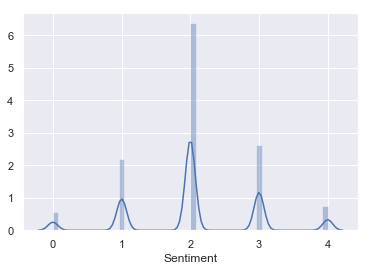

In [21]:
sns.set(color_codes=True)
yy= train.Sentiment
sns.distplot(yy);

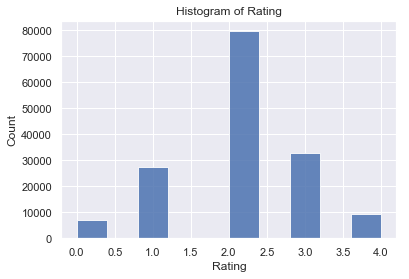

In [22]:
plt.hist(yy, 10, density=False, facecolor='b', alpha=.85)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Histogram of Rating')
plt.grid(True)
plt.show()

In [23]:
train.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [24]:
print("Shape of Train",train.shape)

Shape of Train (156060, 4)


## Preprocessing Stage:

In [25]:
def Prepocessingtext(df,choice):
    reviews = []
    #choice 1 for rotten tomatoes and choice 2 for IMDB dataset
    if choice==1:
      temp='Phrase';
    if choice==2:
      temp='review'

    for sent in tqdm(df[temp]):
        #remove html content
        review_text = BeautifulSoup(sent).get_text()
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
        #remove the white spaces
        review_text = review_text.strip()
        #tokenize the sentences
        words = word_tokenize(review_text.lower())
        #lemmatize each word to its lemma
        lemma_words = [lemmatizer.lemmatize(i) for i in words]
    
        reviews.append(lemma_words)

    return(reviews)

In [26]:
train_sentences=Prepocessingtext(train,1)


  0%|                                                                            | 1/156060 [00:01<79:33:03,  1.84s/it]C:\Users\alins\Anaconda4\lib\site-packages\bs4\__init__.py:272: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
  1%|▍                                                                         | 863/156060 [00:02<19:00:34,  2.27it/s]C:\Users\alins\Anaconda4\lib\site-packages\bs4\__init__.py:272: UserWarning: "b'...'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
  7%|█████▏                                                                   | 11092/156060 [00:06<00:55, 2610.66it/s]


KeyboardInterrupt: 

In [ ]:
train['Phrase']=train_sentences
train['Phrase'] = train['Phrase'].apply(lambda x: ' '.join(x))
print("Length of Train data",len(train_sentences))

In [ ]:
x=train['Phrase']
y=train.Sentiment
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=1)
#Transforming the sentences into one hotencoding form
vect = CountVectorizer()
x_train_df = vect.fit_transform(X_train)
x_test_df = vect.transform(X_test)
print('Number of features:', len(vect.get_feature_names()))


### Types of classifers are loaded into list data structure


In [ ]:
#Nine types of classifers are loaded into list data structure
model_1=MultinomialNB()
classifiers=dict({'MultinomialNB':model_1})
model_2= LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
classifiers.update({'LogisticRegression':model_2})
model_4=RandomForestClassifier(max_depth=25, min_samples_leaf=1,random_state=0,n_estimators=1000)
classifiers.update({'RandomForest':model_4})
model_5 = XGBClassifier(learning_rate =0.001,n_estimators=100,max_depth=15,min_child_weight=1,)
classifiers.update({'XGBClassifier':model_5})
model_6=AdaBoostClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=1000)
classifiers.update({'AdaBoost':model_6})
model_7=GradientBoostingClassifier(n_estimators=1000, learning_rate=.01,max_depth=10, random_state=0)
classifiers.update({'GradientBoosting':model_7})
model_8=LinearSVC(random_state=0)
classifiers.update({'Linear SVM':model_8})
model_9=svm.SVC(kernel='poly', gamma=2)
classifiers.update({'Poly SVM':model_9})


In [ ]:
def Run_models(x_train_df,y_train,x_test_df,y_test,choice):
    for x,clf in classifiers.items():
      clf.fit(x_train_df, y_train)
      y_pred = clf.predict(x_test_df)
      y_pred_train=clf.predict(x_train_df)
      class_names=[0,1,2,3,4]
      print("\nEfficeny of ",x," classifier with test set is :",metrics.accuracy_score(y_test, y_pred))
      print("Efficeny of ",x," classifier with training set is :",metrics.accuracy_score(y_train, y_pred_train))
      print("\n")

      cm = confusion_matrix(y_test, y_pred)
      classes = unique_labels(y_test, y_pred)
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      plt.figure()
      xx='confusion matrix of '+x
      fig, ax = plt.subplots()
      im = ax.imshow(cm,  cmap=plt.cm.Blues)
      ax.figure.colorbar(im, ax=ax)
      ax.set(xticks=np.arange(cm.shape[1]),
            yticks=np.arange(cm.shape[0]),
            xticklabels=classes, yticklabels=classes,
            title=x,
            ylabel='True label',
            xlabel='Predicted label')   
      if choice==2:
          #ROC for Two classes
          xx="ROC of "+x
          plt.figure()
          if x=='Linear SVM' or x=='Poly SVM':
              pred_prob=clf.decision_function(x_test_df)
          else:
              pred_prob=clf.predict_proba(x_test_df)[::,1]
          y_test=  (y_test > 0)
          fpr, tpr, _ = metrics.roc_curve(y_test, pred_prob)
          auc = metrics.roc_auc_score(y_test, pred_prob)
          plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
          plt.legend(loc=4)
          plt.title(xx)
          plt.show()  
      else:
          #ROC for more than two classes
          xx="ROC of "+x
          from sklearn.metrics import roc_curve, auc
          plt.figure()
          fpr = dict()
          tpr = dict()
          roc_auc = dict()
          # Binarize the output
          y_te = label_binarize(y_test, classes=[0, 1, 2,3,4])

          if x=='Linear SVM' or x=='Poly SVM':
              pred_prob=clf.decision_function(x_test_df)
          else:
              pred_prob=clf.predict_proba(x_test_df)

          for i in range(5):
              fpr[i], tpr[i], _ = roc_curve(y_te[:, i], pred_prob[:, i])
              roc_auc[i] = auc(fpr[i], tpr[i])
          colors = cycle(['blue', 'red', 'green','gray','brown'])
          for i, color in zip(range(5), colors):
              plt.plot(fpr[i], tpr[i], color=color, 
                      label='ROC curve of class {0} (area = {1:0.2f})'
                      ''.format(i, roc_auc[i]))
          plt.plot([0, 1], [0, 1], 'k--')
          plt.xlim([-0.05, 1.0])
          plt.ylim([0.0, 1.05])
          plt.xlabel('False Positive Rate')
          plt.ylabel('True Positive Rate')
          plt.title(xx)
          plt.legend(loc="lower right")
          plt.show()


In [ ]:
Run_models(x_train_df,y_train,x_test_df,y_test,1)

# Implementaion of Model for IMDB dataset
Two labels for the data set,namely true of false

In [ ]:
train= pd.read_csv("C:/Users/alins/OneDrive/Documents/MENG/SEMESTER 3/DATA Mining/Project/Final/sentiment Analysis/IMDB Dataset.csv")
train.head()

In [ ]:
yy=train.sentiment

In [ ]:
train_sentences=Prepocessingtext(train,2)


In [ ]:
train['review']=train_sentences
train['review'] = train['review'].apply(lambda x: ' '.join(x))
print("Length of Train data",len(train_sentences))

train['Phrase']=train_sentences
train['Phrase'] = train['Phrase'].apply(lambda x: ' '.join(x))
print("Length of Train data",len(train_sentences))

### Encoding the label with 1 and 0

In [ ]:
x=train['review']
y=train.sentiment

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)


In [ ]:
plt.hist(integer_encoded, 3, density=False, facecolor='b', alpha=.85)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Histogram of Rating')
plt.grid(True)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, integer_encoded, test_size=0.2,  random_state=1)

#Transforming the sentences into one hotencoding form
vect = CountVectorizer()
x_train_df = vect.fit_transform(X_train)
x_test_df = vect.transform(X_test)
print('Number of features:', len(vect.get_feature_names()))

In [ ]:
Run_models(x_train_df,y_train,x_test_df,y_test,2)

## Extra Works
### Deep Learning Model with LSTM Network

In [27]:
from tensorflow.keras.utils import to_categorical
import random
import tensorflow as tf
from tensorflow import set_random_seed
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense,Dropout,Embedding,LSTM,Bidirectional,Conv1D 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [30]:
# for Rotten Tomatoes
train= pd.read_csv("./train.tsv", sep="\t")
train.head(5)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [31]:
def clean_sentences(df):
    reviews = []

    for sent in tqdm(df['Phrase']):
        review_text = BeautifulSoup(sent).get_text()
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
        words = word_tokenize(review_text.lower())
        lemma_words = [lemmatizer.lemmatize(i) for i in words]
        reviews.append(lemma_words)

    return(reviews)

In [32]:
train_sentences = clean_sentences(train)
print("Length of Train data",len(train_sentences))

  0%|                                                                                       | 0/156060 [00:00<?, ?it/s]C:\Users\alins\Anaconda4\lib\site-packages\bs4\__init__.py:272: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
  0%|▎                                                                          | 619/156060 [00:00<01:19, 1950.81it/s]C:\Users\alins\Anaconda4\lib\site-packages\bs4\__init__.py:272: UserWarning: "b'...'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
100%|████████████████████████████████████████████████████████████████████████| 156060/156060 [01:02<00:00, 2508.53it/s]


Length of Train data 156060


In [33]:
train_sentences

[['a',
  'series',
  'of',
  'escapade',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose',
  'is',
  'also',
  'good',
  'for',
  'the',
  'gander',
  'some',
  'of',
  'which',
  'occasionally',
  'amuses',
  'but',
  'none',
  'of',
  'which',
  'amount',
  'to',
  'much',
  'of',
  'a',
  'story'],
 ['a',
  'series',
  'of',
  'escapade',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['a', 'series'],
 ['a'],
 ['series'],
 ['of',
  'escapade',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['of'],
 ['escapade',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['escapade'],
 ['demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],
 ['demonstrating', 'the', 'adage'],
 ['demonstrating'],
 ['the', 'adage']

In [36]:
train['Phrase']=train_sentences
train['Phrase'] = train['Phrase'].apply(lambda x: ' '.join(x))
print("Length of Train data",len(train_sentences))
x=train['Phrase']
x[1]

Length of Train data 156060


'a series of escapade demonstrating the adage that what is good for the goose'

In [42]:
target=train.Sentiment.values
y_target=to_categorical(target)
num_classes=y_target.shape[1]

In [54]:
X_train,X_val,y_train,y_val=train_test_split(train_sentences,y_target,test_size=0.2,stratify=y_target)

In [52]:
unique_words = set()
len_max = 0

for sent in tqdm(X_train):
    
    unique_words.update(sent)
    
    if(len_max<len(sent)):
        len_max = len(sent)
        
#length of the list of unique_words gives the no of unique words
print("Number of Unique words",len(list(unique_words)))
print("Longest sentence of all reviews",len_max)

100%|██████████████████████████████████████████████████████████████████████| 124848/124848 [00:00<00:00, 389993.47it/s]


Number of Unique words 13742
Longest sentence of all reviews 48


In [55]:
tokenizer = Tokenizer(num_words=len(list(unique_words)))
tokenizer.fit_on_texts(list(X_train))

#texts_to_sequences(texts)

#Arguments- texts: list of texts to turn to sequences.
#Return: list of sequences (one per text input).
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)



print(X_train[:30])


[[47, 109, 3765, 392], [333, 4], [25, 6718, 175, 32, 71, 1316, 330, 17, 20, 137, 626, 6, 7, 2439, 4, 298, 200, 290], [1, 39, 84, 6, 7], [2146, 1277], [1, 9153, 171], [1347], [7761], [5, 2594, 1, 113, 4, 6, 1867], [1595], [5694, 2489], [1066, 521, 362, 1785, 5695, 29, 3130, 6345, 38], [9, 5, 2595, 113, 13, 806], [50, 3, 1, 375, 11, 1, 12], [1, 76, 1189, 6346], [1, 9154, 13133, 1052, 2, 25, 1983, 4, 532, 939], [10, 6347, 7, 7201, 374, 37, 28, 8392, 551, 26, 7202, 7762], [57, 291, 124, 9155, 97, 91], [9, 167, 17, 2, 2101, 7763, 1670, 3, 2656, 806, 10, 2191, 27, 2, 54, 94, 172, 364, 181, 30, 1317, 38, 908, 2, 5409, 111, 5696, 22, 6, 95, 732, 118, 857], [12520, 918, 1381, 11, 2, 759], [3641, 1189], [22, 1, 139, 57, 24, 8, 1, 98, 31, 1, 12, 248, 5, 132, 262], [63, 545], [1596], [7764, 1725], [5, 1420, 2, 704, 5697], [1174], [1, 122, 12], [45, 19, 2967, 11, 1458, 51, 1, 61, 2596, 9, 68, 42, 1691, 133, 145, 125, 118, 624], [12521]]


In [ ]:
#padding done to equalize the lengths of all input reviews. LSTM networks needs all inputs to be same length.
#Therefore reviews lesser than max length will be made equal using extra zeros at end. This is padding.

X_train = sequence.pad_sequences(X_train, maxlen=len_max)
X_val = sequence.pad_sequences(X_val, maxlen=len_max)
print(X_train.shape,X_val.shape)

### Text tokenization utility class.

This class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf...

In [ ]:
early_stopping = EarlyStopping(min_delta = 0.001, mode = 'max', monitor='val_acc', patience = 2)
callback = [early_stopping]

### Deep learning Model

In [ ]:
model=Sequential()
model.add(Embedding(len(list(unique_words)),500,input_length=len_max))
model.add(Bidirectional(LSTM(128,dropout=0.3, recurrent_dropout=0.3,return_sequences=True)))
model.add(Bidirectional(LSTM(64,dropout=0.3, recurrent_dropout=0.3,return_sequences=False)))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.005),metrics=['accuracy'])
model.summary()

In [ ]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=6, batch_size=1024, verbose=1, callbacks=callback)

In [ ]:
# Create count of the number of epochs
epoch_count = range(1, len(history.history['loss']) + 1)

# Visualize learning curve. 
plt.plot(epoch_count, history.history['loss'], 'r--')
plt.plot(epoch_count, history.history['val_loss'], 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()